# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Triều Khoáng    
- MSSV: 22127204   
- Lớp: 22CLC05

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import thêm dữ thư viện nếu cần
import seaborn as sns

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng cách khác nếu cần

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        X_pinv = np.linalg.pinv(X)
        self.coef_ = X_pinv @ y
        
        return self

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.coef_

    def get_params(self):
        return self.coef_

    def intercept(self):
        return self.coef_[0]

    def coef(self):
        return self.coef_[1:]
    
    def preprocess(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
    
def shuffle_data(X, y):
    shuffled_indices = np.random.permutation(len(y))
    return X[shuffled_indices], y[shuffled_indices]

def k_fold_cross_validation(X, y, k, model):
    fold_size = len(y) // k
    mae_scores = []
    
    for i in range(k):
        start = i * fold_size
        end = start + fold_size if i != k - 1 else len(y)
        
        X_val = X[start:end]
        y_val = y[start:end]
        
        X_train_fold = np.vstack((X[:start], X[end:]))
        y_train_fold = np.hstack((y[:start], y[end:]))
        
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val)
        mae = np.mean(np.abs(y_val - y_pred))
        mae_scores.append(mae)
    
    return np.mean(mae_scores)

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9000 non-null   int64  
 1   Previous Scores                   9000 non-null   int64  
 2   Extracurricular Activities        9000 non-null   int64  
 3   Sleep Hours                       9000 non-null   int64  
 4   Sample Question Papers Practiced  9000 non-null   int64  
 5   Performance Index                 9000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 422.0 KB
Thống kê mô tả cho các đặc trưng số: 
        Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000   

<Figure size 2000x1500 with 0 Axes>

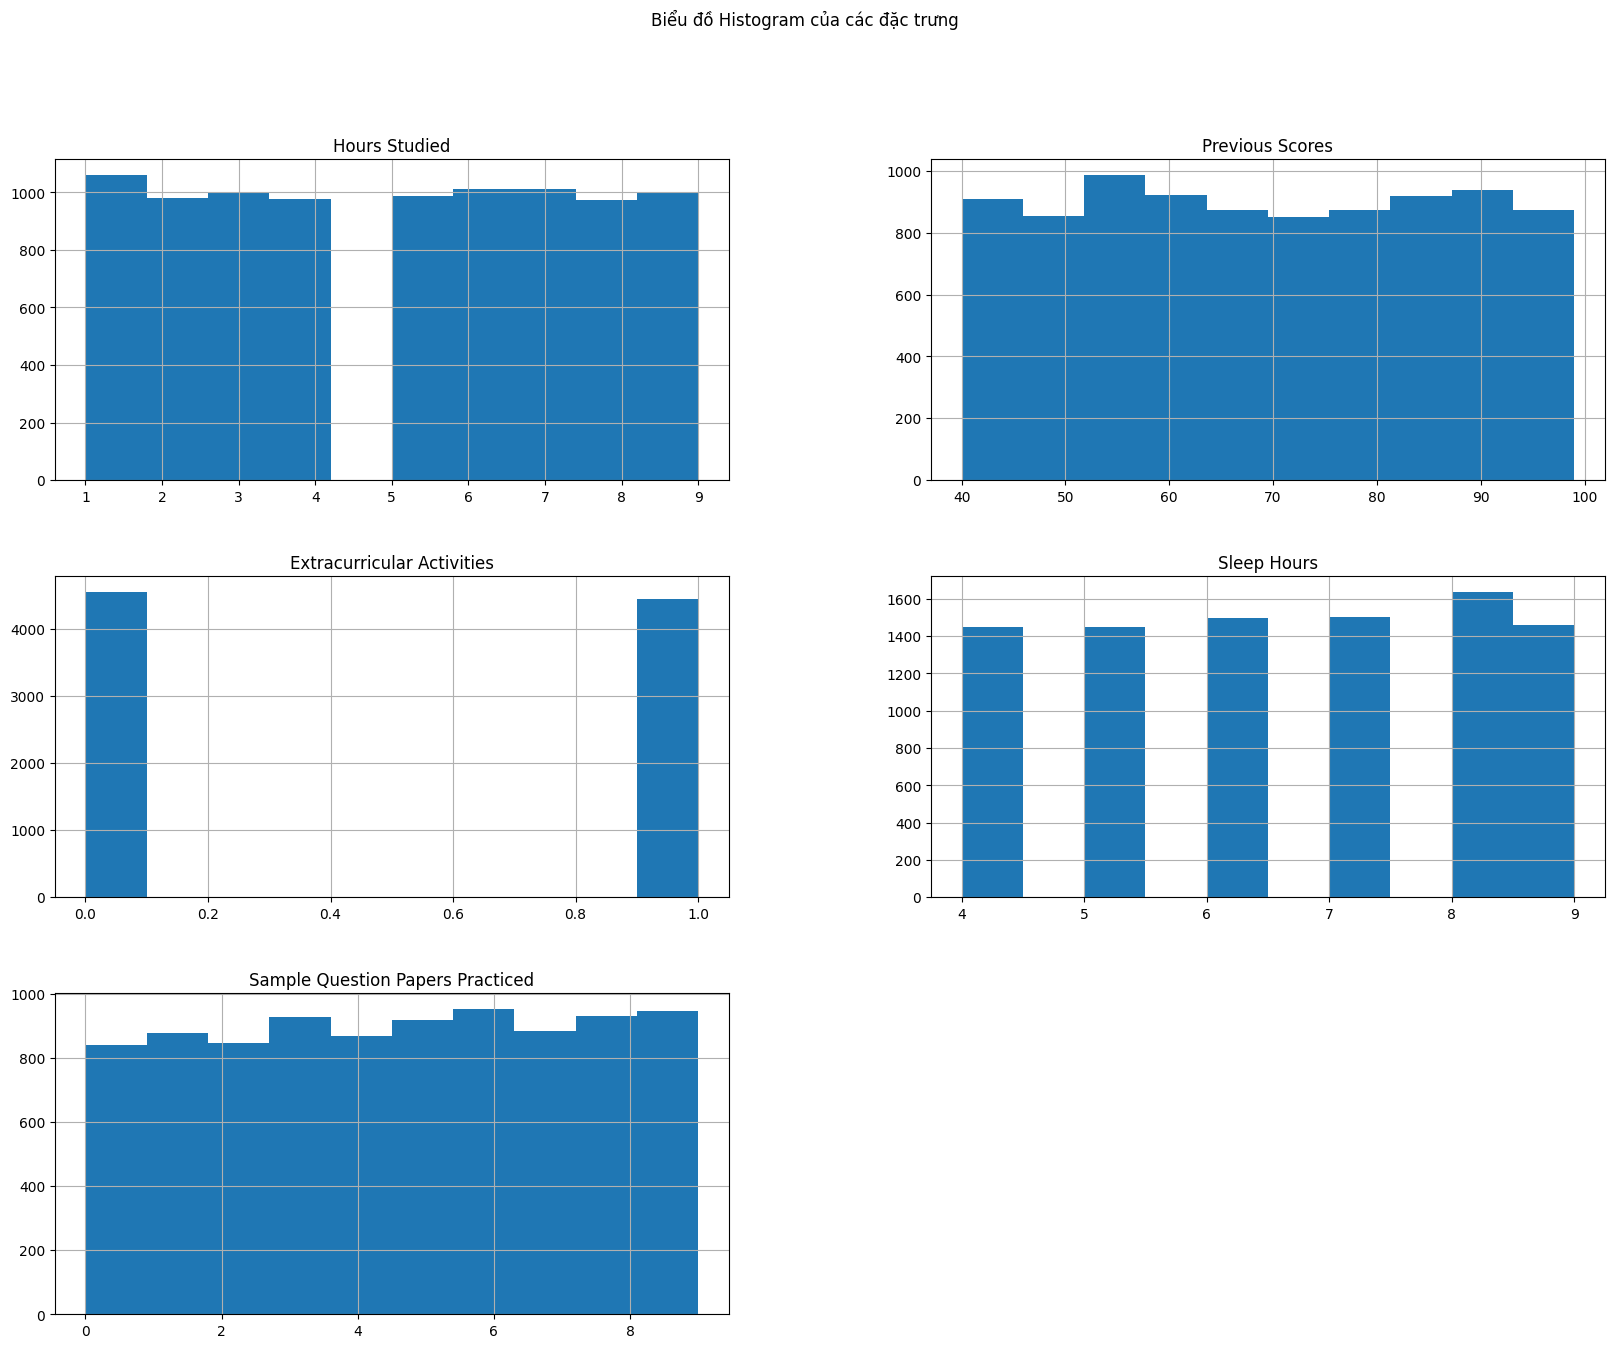

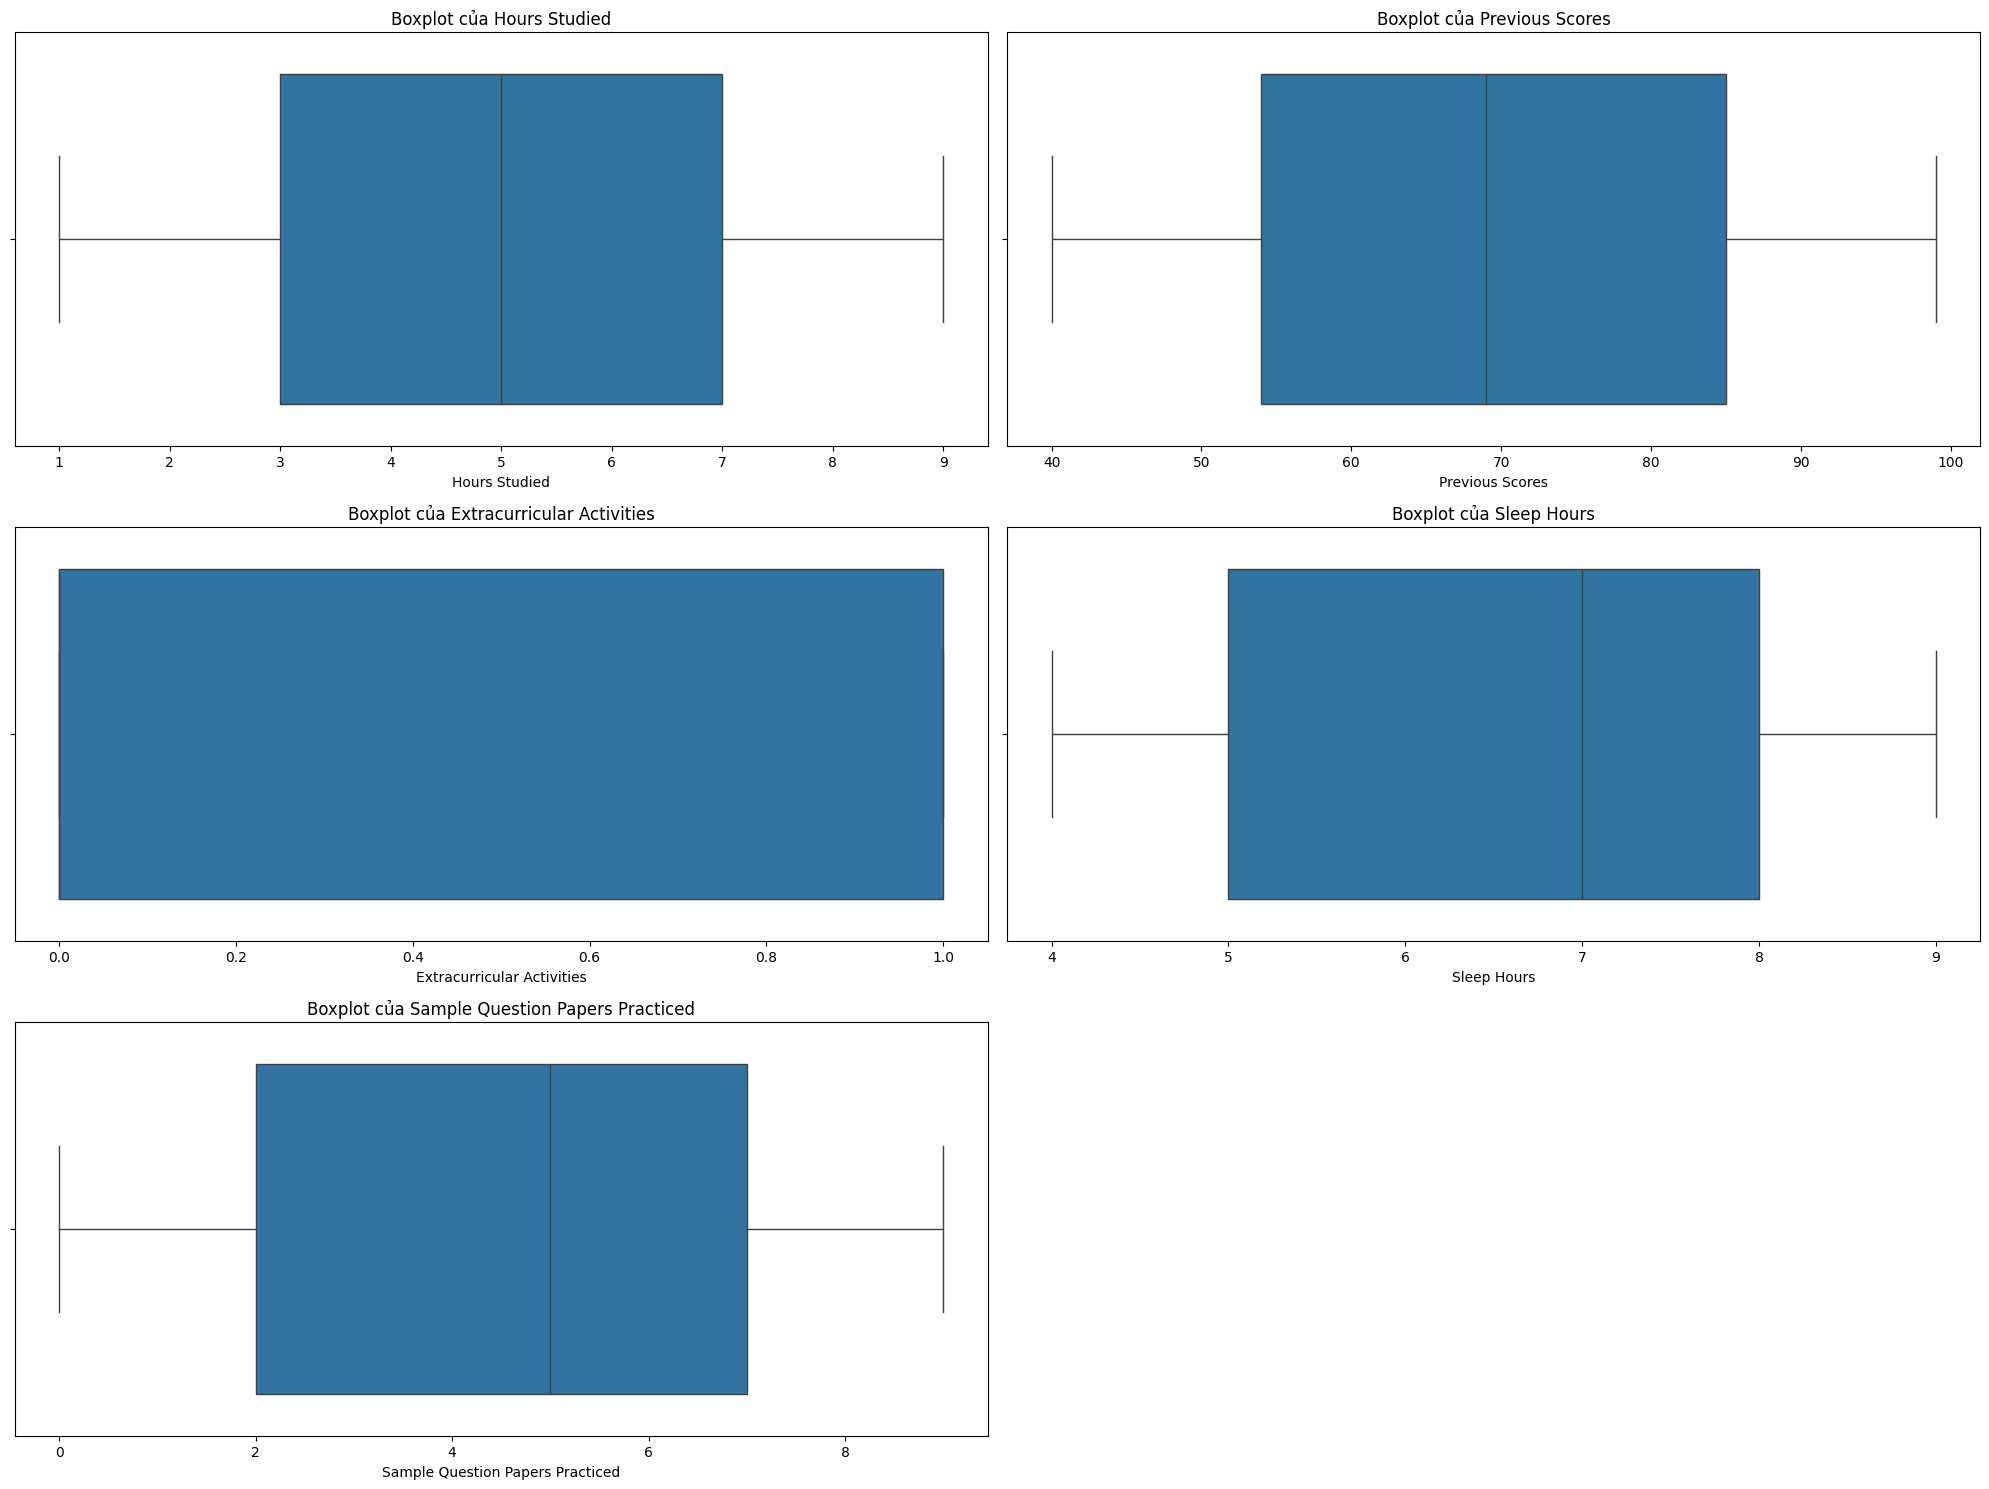

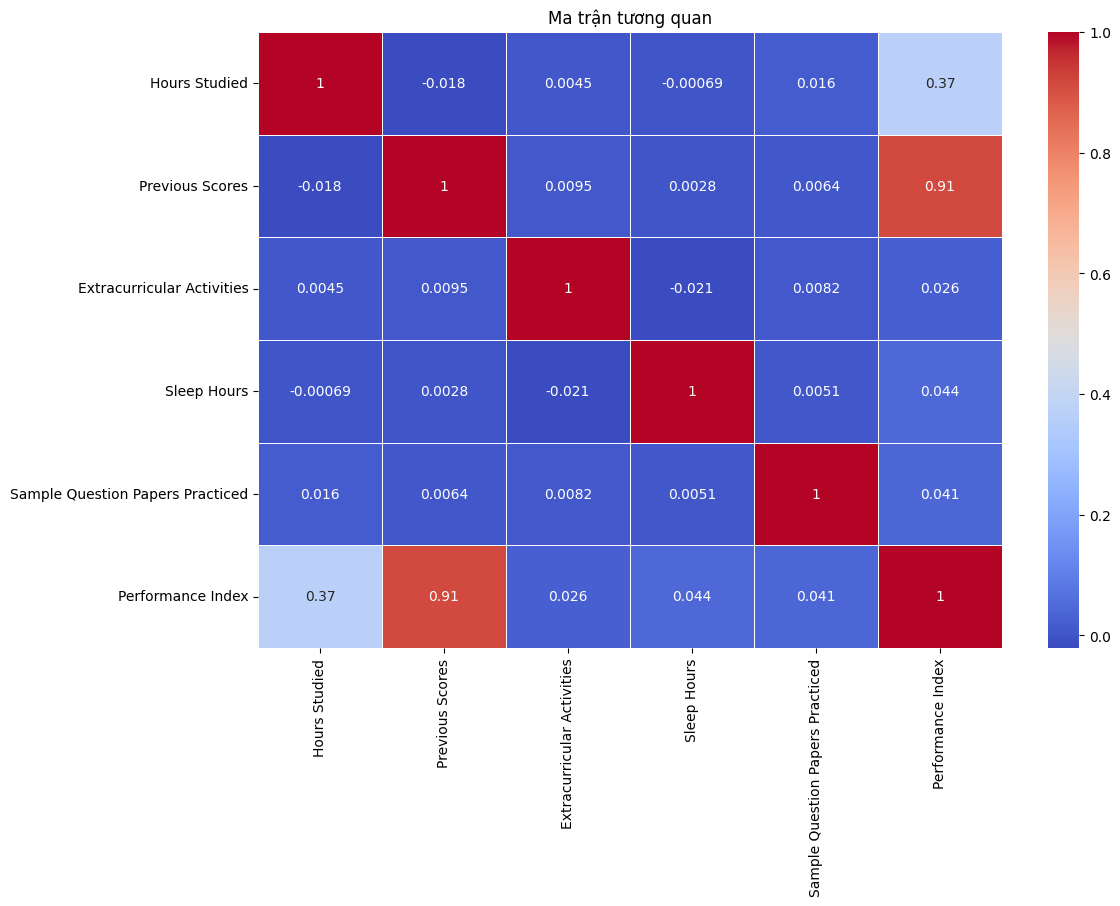

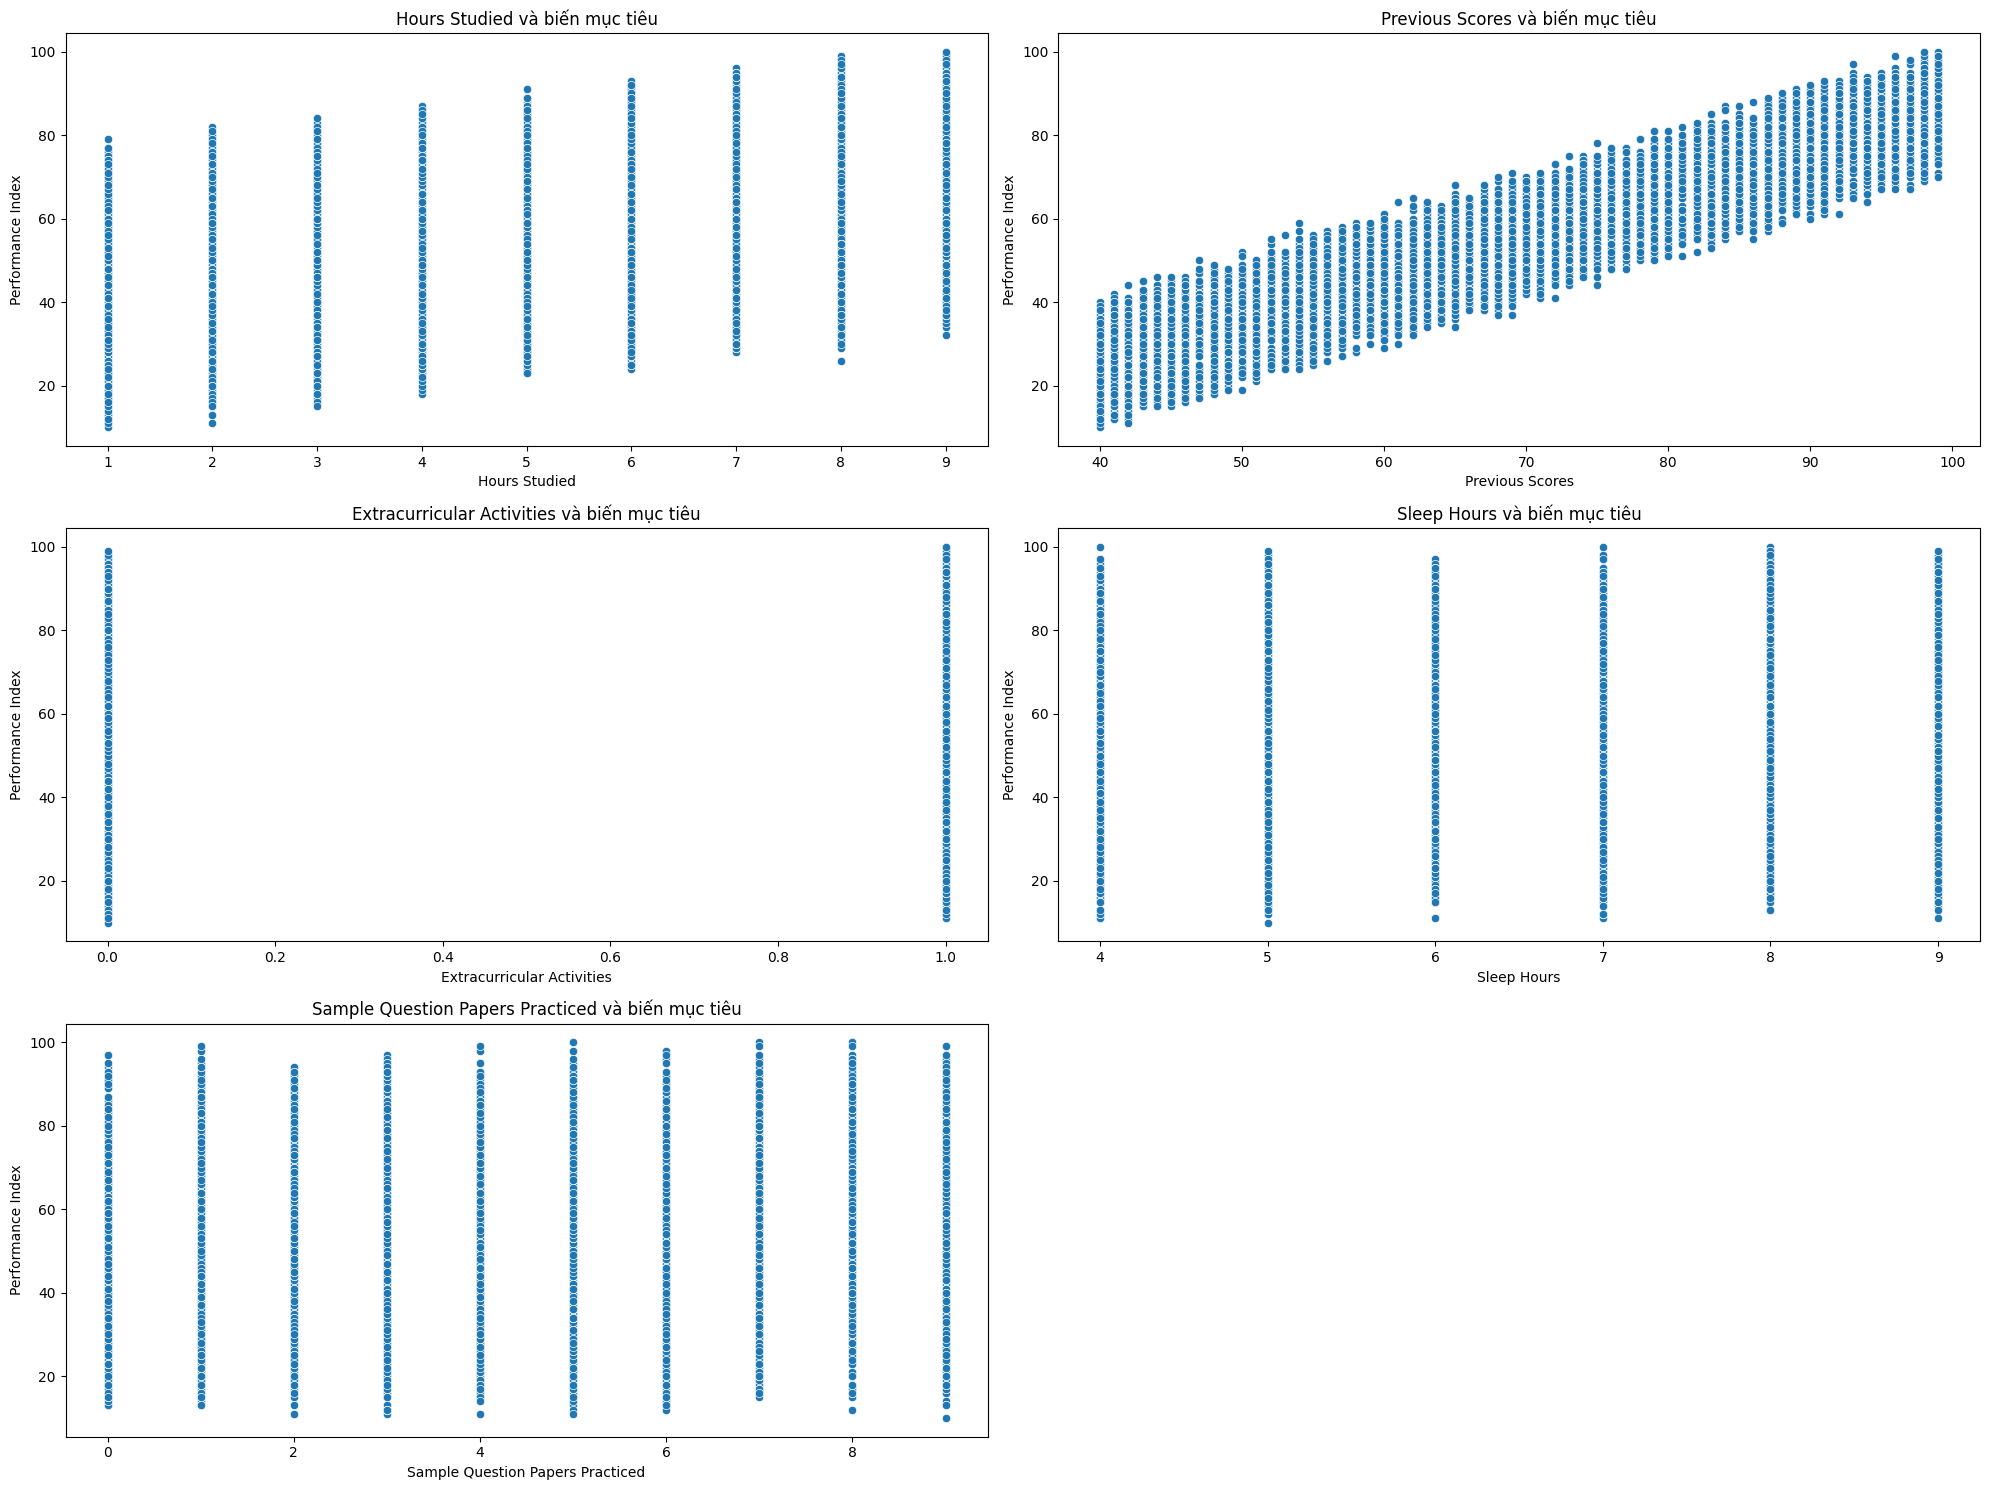

In [4]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

# Kiểm tra cấu trúc dữ liệu
train.info()

# Thống kê mô tả cho các đặc trưng số
print("Thống kê mô tả cho các đặc trưng số: \n", train.describe())

# Phân tích phân phối của các đặc trưng
plt.figure(figsize=(20, 15))
train.iloc[:, :-1].hist(figsize=(20, 15))  # Loại trừ cột mục tiêu
plt.suptitle('Biểu đồ Histogram của các đặc trưng')
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(train.columns[:-1], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot của {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan')
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(train.columns[:-1], 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=train[col], y=y_train)
    plt.title(f'{col} và biến mục tiêu')
plt.tight_layout()
plt.show()




# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [5]:
# Phần code cho yêu cầu 2b

lr = OLSLinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_test)

lr.get_params()

array([-33.96928368,   2.85202007,   1.01786957,   0.60428174,
         0.47356583,   0.19237624])

In [6]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra 

mae = MAE(y_test, y_predict)
print("Mean Absolute Error trên tập kiểm tra:", mae)

Mean Absolute Error trên tập kiểm tra: 1.5956486884762948


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + 2.852*HS + 1.018*PS + 0.604*EA + 0.474*SH + 0.192*SQPP = 1.596 $$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [7]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

X_train_shuffled, y_train_shuffled = shuffle_data(X_train.to_numpy(), y_train.to_numpy())

k = 5
best_feature = None
best_mae = float('inf')
mae_list = []

for i in range(X_train.shape[1]):
    X_train_feature = X_train_shuffled[:, i].reshape(-1, 1)

    model = OLSLinearRegression()
    
    mae = k_fold_cross_validation(X_train_feature, y_train_shuffled, k, model)
    mae_list.append((mae, X_train.columns[i]))
    
    if mae < best_mae:
        best_mae = mae
        best_feature = i

for mae, feature in mae_list:
    print(feature,": ", mae)      

print("Đặc trưng tốt nhất:", X_train.columns[best_feature], "với MAE trung bình:", best_mae)



Hours Studied :  15.44889490310086
Previous Scores :  6.6174612924819485
Extracurricular Activities :  16.197921422755776
Sleep Hours :  16.18639559762187
Sample Question Papers Practiced :  16.186561835041594
Đặc trưng tốt nhất: Previous Scores với MAE trung bình: 6.6174612924819485


In [8]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_feature_model = OLSLinearRegression().fit(X_train.iloc[:, best_feature].values.reshape(-1, 1), y_train)
print(best_feature_model.get_params())

y_predict_best_feature = best_feature_model.predict(X_test.iloc[:, best_feature].values.reshape(-1, 1))


[-14.98864578   1.01050301]


In [9]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
mae_best_feature = MAE(y_test, y_predict_best_feature)
print("Mean Absolute Error trên tập kiểm tra với mô hình best_feature_model:", mae_best_feature)


Mean Absolute Error trên tập kiểm tra với mô hình best_feature_model: 6.544277293452511


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + 1.011PS = 6.544$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [10]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
models = [
        ("Hours Studied + Previous Scores", X_train_shuffled[:, [0, 1]]),
        ("Hours Studied**2 + Previous Scores**2", (X_train_shuffled[:, [0, 1]] ** 2)),
        ("Hours Studied * Previous Scores", (X_train_shuffled[:, 0] * X_train_shuffled[:, 1]).reshape(-1, 1)),
        ("Previous Scores**3", (X_train_shuffled[:, 1] ** 3).reshape(-1, 1))
    ]


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [11]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

best_model = None
best_model_mae = float('inf')
best_model_list = []

for model_name, X_model in models:
    model = OLSLinearRegression()
    
    mae = k_fold_cross_validation(X_model, y_train_shuffled, k, model)
    best_model_list.append((mae, model_name))
    
    if mae < best_model_mae:
        best_model_mae = mae
        best_model = model_name

for mae, model_name in best_model_list:
    print(model_name, ":", mae)       
print("Mô hình tốt nhất:", best_model, "với MAE trung bình:", best_model_mae)


Hours Studied + Previous Scores : 1.8166943112079572
Hours Studied**2 + Previous Scores**2 : 2.749686794862158
Hours Studied * Previous Scores : 11.082680858437305
Previous Scores**3 : 7.144361912976483
Mô hình tốt nhất: Hours Studied + Previous Scores với MAE trung bình: 1.8166943112079572


In [12]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_best_model = X_train.iloc[:, [0, 1]]
my_best_model = OLSLinearRegression().fit(X_best_model, y_train.to_numpy())
print(my_best_model.get_params())

[-29.7467318    2.85576037   1.01837886]


In [13]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
y_predict_my_best_model = my_best_model.predict(X_test.iloc[:, [0, 1]])
mae_my_best_model = MAE(y_test, y_predict_my_best_model)
print("Mean Absolute Error trên tập kiểm tra với mô hình my_best_model:", mae_my_best_model)

Mean Absolute Error trên tập kiểm tra với mô hình my_best_model: 1.8394363976529897


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -29.747 + 2.856*HS + 1.018*PS = 1.839$$